In [2]:
from skimage.io import imread
import matplotlib.pyplot as plt
import os
import random
import pandas as pd
import numpy as np
import h5py


import sys
sys.path.insert(0, '../lib/')
from help_functions import *

In [3]:
# Get Images From the OSHU server
img_list = pd.read_csv("imageListJimmy.csv")
img_list.ix[0]['cx']
len(img_list)

15552

In [6]:
count = 0 
target_img_list = []
target_cx = []
target_cy = []
target_img_data = None
for i in range(len(img_list)):
    if i%100 == 0:
        print(str(i*100/float(len(img_list))) + "%...")
    path = img_list.ix[i]['imageID']
    img = imread(path)
    if img.shape[0] == 480 and img.shape[1] == 640 and img.shape[2] == 3:
        if np.isnan(img_list.ix[i]['cx']) or np.isnan(img_list.ix[i]['cy']):
            continue
        img = img.reshape((1,480,640,3))
        if count == 0:
            target_img_data = img
        else:
            target_img_data = np.concatenate((target_img_data, img),axis = 0)
        target_img_list.append(path)
        target_cx.append(img_list.ix[i]['cx'])
        target_cy.append(img_list.ix[i]['cy'])
        count += 1



0.0%...
0.643004115226%...
1.28600823045%...
1.92901234568%...
2.57201646091%...
3.21502057613%...
3.85802469136%...
4.50102880658%...
5.14403292181%...
5.78703703704%...
6.43004115226%...
7.07304526749%...
7.71604938272%...
8.35905349794%...
9.00205761317%...
9.6450617284%...
10.2880658436%...
10.9310699588%...
11.5740740741%...
12.2170781893%...
12.8600823045%...
13.5030864198%...
14.146090535%...
14.7890946502%...
15.4320987654%...
16.0751028807%...
16.7181069959%...
17.3611111111%...
18.0041152263%...
18.6471193416%...
19.2901234568%...
19.933127572%...
20.5761316872%...
21.2191358025%...
21.8621399177%...
22.5051440329%...
23.1481481481%...
23.7911522634%...
24.4341563786%...
25.0771604938%...
25.7201646091%...
26.3631687243%...
27.0061728395%...
27.6491769547%...
28.29218107%...
28.9351851852%...
29.5781893004%...
30.2211934156%...
30.8641975309%...
31.5072016461%...
32.1502057613%...
32.7932098765%...
33.4362139918%...
34.079218107%...
34.7222222222%...
35.3652263374%...
36.0082

In [10]:
write_hdf5(target_img_data,"localizer_data.hdf5")
        
d = {"Center X":target_cx, "Center Y": target_cy}
center = pd.DataFrame(d)
center.to_csv("localizer_center.csv")

In [8]:
target_img_data = load_hdf5("localizer_data.hdf5")

In [9]:
part_data = target_img_data[0:1000]

In [10]:
part_data.shape

(1000, 480, 640, 3)

In [11]:
#proc_data = np.rollaxis(part_data,3,1)
trim_data = part_data[:,:,80:560,:]


In [14]:
center = pd.read_csv("localizer_center.csv")
#filter_index = np.array(target_cx)
#filter_index = np.where(filter_index >= 80 & filter_index <= 560)

In [19]:
center_x = center["Center X"]
center_y = center["Center Y"]

In [4]:
len(target_img_data)

10494

In [3]:
target_img_data = load_hdf5("localizer_data.hdf5")

center = pd.read_csv("localizer_center.csv")
center_x = center["Center X"]
center_y = center["Center Y"]

filter_index = np.array(center_x)
filter_index = np.where(np.logical_and(filter_index >=80, filter_index<=560))
filter_index = filter_index[0]

filter_cx = list(center_x[filter_index] - 80)
filter_cy = list(center_y[filter_index])
filter_img = target_img_data[filter_index]

trim_data = filter_img[:,:,80:560,:]
output_center = np.column_stack((filter_cy,filter_cx))

In [8]:
raw_train = np.rollaxis(trim_data,3,1)
raw_train.shape

(9047, 3, 480, 480)

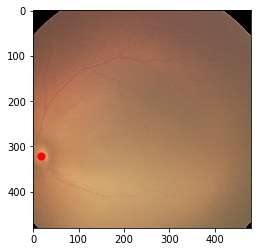

In [5]:
i = 1234
img = trim_data[i]
plt.figure()
plt.imshow(img)
plt.scatter(output_center[i,1] ,output_center[i,0], s=50, c='red', marker='o')
plt.show()

In [96]:
output_center = np.column_stack((filter_cy,filter_cx))

In [97]:
output_center[0:10,:]

array([[218.,  23.],
       [286.,  41.],
       [320., 269.],
       [416., 239.],
       [299., 399.],
       [ 35., 430.],
       [270., 339.],
       [299.,  98.],
       [269., 156.],
       [343., 284.]])

In [98]:
filter_cy[0:10]

[218.0, 286.0, 320.0, 416.0, 299.0, 35.0, 270.0, 299.0, 269.0, 343.0]

In [99]:
filter_cx[0:10]

[23.0, 41.0, 269.0, 239.0, 399.0, 430.0, 339.0, 98.0, 156.0, 284.0]

In [17]:
d = {"Center X":target_cx, "Center Y": target_cy}
center = pd.DataFrame(d)
center.to_csv("localizer_center.csv")

In [18]:
center

,Center X,Center Y
0,351.0,126.0
1,318.0,53.0
2,204.0,238.0
3,261.0,397.0
4,215.0,61.0
5,284.0,85.0
6,136.0,197.0
7,157.0,215.0
8,470.0,237.0
9,367.0,412.0


In [100]:
t = img.reshape((1,480,640,3))

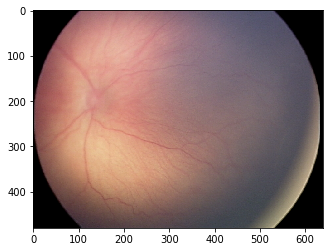

In [102]:
img = np.squeeze(t)
plt.imshow(img)

In [1]:
import numpy as np
import ConfigParser
from matplotlib import pyplot as plt
import os
import random
import pandas as pd
import numpy as np
import h5py
#Keras
from keras.models import model_from_json
from keras.models import Model
from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, UpSampling2D, Reshape, core, Dropout
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Convolution2D, MaxPooling2D, ZeroPadding2D, Input, Embedding, LSTM, merge, Lambda, UpSampling2D, Deconvolution2D, Cropping2D
from keras.optimizers import Adam, RMSprop
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as K
from keras.utils.vis_utils import plot_model as plot
from keras.optimizers import SGD
from keras import regularizers

#scikit learn
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import sys
sys.path.insert(0, './lib/')
# help_functions.py
from help_functions import *
# extract_patches.py
from extract_patches import *
from extract_patches import recompone
from extract_patches import recompone_overlap
from extract_patches import paint_border
from extract_patches import kill_border
from extract_patches import pred_only_FOV
from extract_patches import get_data_testing
from extract_patches import get_data_testing_overlap
# pre_processing.py
from help_functions import *
from pre_processing import *
from extract_patches import *
from mask_retina import *
from model import *
from dual_IDG import *

Using TensorFlow backend.


In [2]:
#target_img_data = load_hdf5("localizer_data.hdf5")

center = pd.read_csv("localizer_center.csv")
center_x = center["Center X"]
center_y = center["Center Y"]

filter_index = np.array(center_x)
filter_index = np.where(np.logical_and(filter_index >=80, filter_index<=560))
filter_index = filter_index[0]

filter_cx = list(center_x[filter_index] - 80)
filter_cy = list(center_y[filter_index])
#filter_img = target_img_data[filter_index]

#trim_data = filter_img[:,:,80:560,:]
center_train = np.column_stack((filter_cy,filter_cx))

#raw_train = np.rollaxis(trim_data,3,1)
#raw_train_processed = my_PreProc(raw_train)


In [5]:
model = get_unet2(1,480,480)

./lib/model.py:296: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("ac..., inputs=Tensor("in...)`
  model = Model(input=inputs, output=conv10)


In [6]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1, 480, 480)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 480, 480) 320         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 480, 480) 128         conv2d_1[0][0]                   
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 32, 480, 480) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (